## Import Library

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow import keras

## Data Loading

In [3]:
X_df = pd.read_csv("datasetcsv/landmark.csv", header=None)
y_df = pd.read_csv("datasetcsv/label.csv", header=None)
y_df.columns = ["target"]

In [4]:
df = pd.concat([X_df,y_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3989 non-null   float64
 1   1       3989 non-null   float64
 2   2       3989 non-null   float64
 3   3       3989 non-null   float64
 4   4       3989 non-null   float64
 5   5       3989 non-null   float64
 6   6       3989 non-null   float64
 7   7       3989 non-null   float64
 8   8       3989 non-null   float64
 9   9       3989 non-null   float64
 10  10      3989 non-null   float64
 11  11      3989 non-null   float64
 12  12      3989 non-null   float64
 13  13      3989 non-null   float64
 14  14      3989 non-null   float64
 15  15      3989 non-null   float64
 16  16      3989 non-null   float64
 17  17      3989 non-null   float64
 18  18      3989 non-null   float64
 19  19      3989 non-null   float64
 20  20      3989 non-null   float64
 21  21      3989 non-null   float64
 22  

In [5]:
#shape
print(df.shape)

(3989, 43)


## Data Cleaning

In [6]:
#Copy dataset
dfs = df.copy()

In [7]:
#check null values
dfs.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
target    0
dtype: int64

In [8]:
#Check duplicate values
print("Total duplicate rows :" ,dfs.duplicated().sum())
dfs[dfs.duplicated(keep=False) == True]

Total duplicate rows : 10


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,target
2840,0.0,0.0,-0.050542,-0.166065,-0.173285,-0.277978,-0.234657,-0.407942,-0.205776,-0.523466,...,0.039711,-0.364621,0.140794,-0.548736,0.169675,-0.664260,0.184116,-0.765343,0.176895,2
2859,0.0,0.0,-0.050542,-0.166065,-0.173285,-0.277978,-0.234657,-0.407942,-0.205776,-0.523466,...,0.039711,-0.364621,0.140794,-0.548736,0.169675,-0.664260,0.184116,-0.765343,0.176895,2
2889,0.0,0.0,0.004785,-0.217703,-0.119617,-0.382775,-0.265550,-0.476077,-0.368421,-0.564593,...,-0.100478,-0.377990,0.057416,-0.588517,0.038278,-0.712919,0.021531,-0.818182,0.011962,2
2908,0.0,0.0,0.004785,-0.217703,-0.119617,-0.382775,-0.265550,-0.476077,-0.368421,-0.564593,...,-0.100478,-0.377990,0.057416,-0.588517,0.038278,-0.712919,0.021531,-0.818182,0.011962,2
3857,0.0,0.0,-0.006173,-0.172840,0.089506,-0.339506,0.200617,-0.456790,0.293210,-0.558642,...,-0.064815,0.438272,0.030864,0.617284,0.070988,0.722222,0.095679,0.814815,0.117284,3
3858,0.0,0.0,-0.052239,-0.201493,0.037313,-0.388060,0.175373,-0.511194,0.279851,-0.626866,...,-0.190299,0.455224,-0.003731,0.638060,0.003731,0.750000,0.007463,0.850746,0.007463,3
3860,0.0,0.0,-0.152174,-0.217391,-0.126087,-0.434783,-0.056522,-0.608696,-0.013043,-0.786957,...,-0.656522,0.491304,-0.239130,0.682609,-0.334783,0.817391,-0.386957,0.934783,-0.417391,3
3861,0.0,0.0,-0.072519,-0.198473,-0.015267,-0.381679,0.103053,-0.515267,0.209924,-0.622137,...,-0.232824,0.431298,-0.003817,0.629771,-0.019084,0.759542,-0.034351,0.862595,-0.041985,3
3862,0.0,0.0,-0.038023,-0.209125,0.064639,-0.414449,0.193916,-0.551331,0.277567,-0.684411,...,-0.330798,0.471483,-0.068441,0.653992,-0.091255,0.764259,-0.110266,0.863118,-0.133080,3
3863,0.0,0.0,-0.067278,-0.211009,-0.006116,-0.428135,0.073394,-0.599388,0.113150,-0.761468,...,-0.544343,0.385321,-0.137615,0.559633,-0.226300,0.681957,-0.287462,0.795107,-0.342508,3


In [9]:
#drop duplicates
dfs.drop_duplicates(inplace=True)

In [10]:
#Final dataset
dfs.shape

(3979, 43)

## Data Visualization

<ipython-input-264-75d70b2259c2>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfs.hist(ax=ax , color="orange", bins=50)


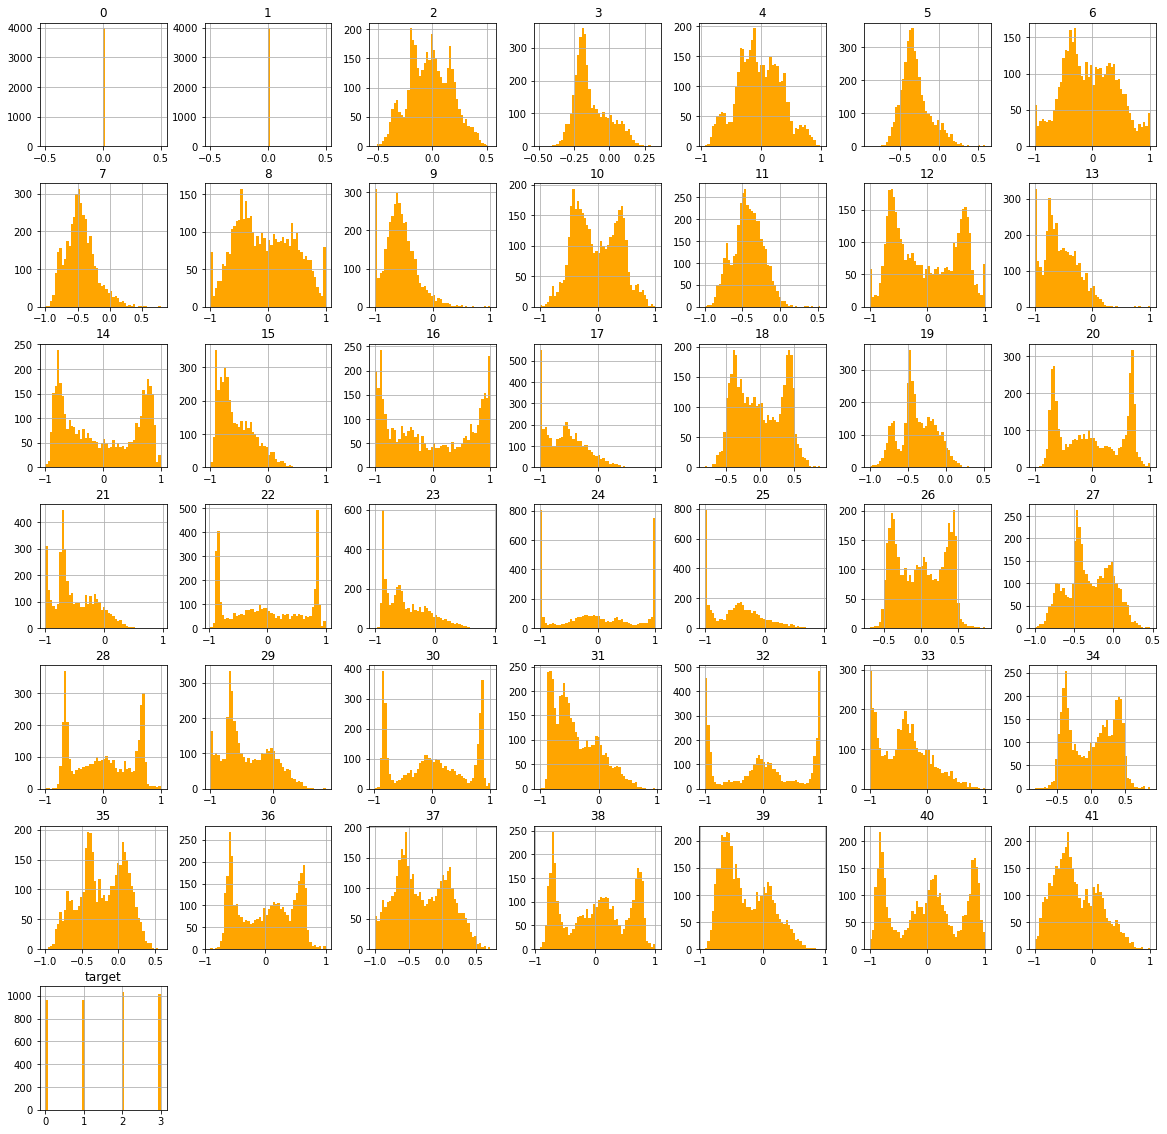

In [264]:
#profile
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
dfs.hist(ax=ax , color="orange", bins=50)
plt.show()

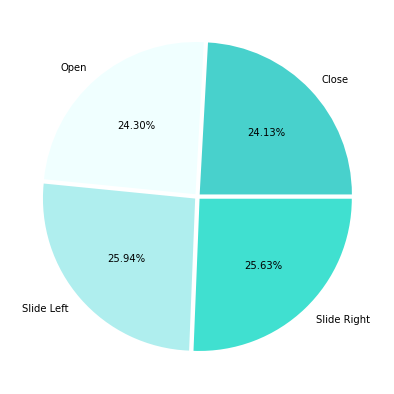

,target,total
0,0,960
1,1,967
2,2,1032
3,3,1020


In [11]:
#query1
q1 = dfs.groupby("target")[0].count().reset_index()
q1.columns =["target","total"]

plt.figure(figsize=(7,7))
plt.pie(q1['total'], labels=["Close","Open","Slide Left","Slide Right"], 
        autopct="%.2f%%",
        colors=["mediumturquoise","azure","paleturquoise","turquoise"],
        explode=[0.02,0.02,0.02,0.02])
plt.show()

q1


## Data PreProcessing

In [13]:
#Define features and target
dataset = dfs.to_numpy()
X = dataset[:,:-1]
y = dataset[:,-1]


### Split dataset

In [14]:
#Split data into train, test, validation set
X_train, X_dataset, y_train, y_dataset  = train_test_split(X,y , test_size=0.2, shuffle=True, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_dataset, y_dataset, test_size=0.4, shuffle=True, random_state=42 )

In [15]:
print("Total training data : ", X_train.shape[0])
print("Total testing data : ", X_test.shape[0])
print("Total validation data : ", X_valid.shape[0])

Total training data :  3183
Total testing data :  319
Total validation data :  477


## Modeling

In [372]:
#Define target class
class_names = {
    0:"close",
    1:"open",
    2:"slide left",
    3:"slide right"
}

print(" Total class target we have :" ,len(class_names))

 Total class target we have : 4


In [386]:
#Set random seed
tf.keras.backend.clear_session
np.random.seed(42)
tf.random.set_seed(42)

In [387]:
#Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.BatchNormalization(), #
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu',kernel_initializer=keras.initializers.HeUniform(seed=42)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), #
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer=keras.initializers.HeUniform(seed=42)),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

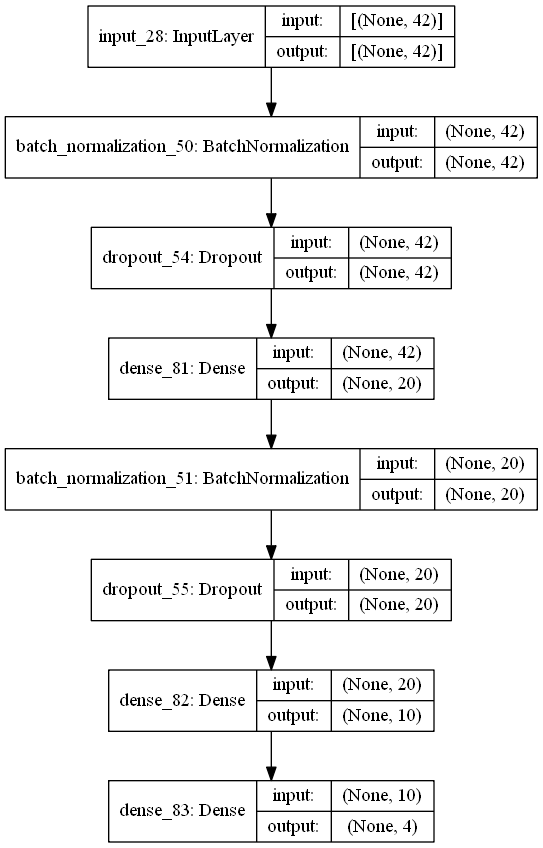

In [388]:
#Model architecture
keras.utils.plot_model(model, show_shapes=True)

In [389]:
from datetime import datetime

In [390]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [396]:
model_best = tf.keras.callbacks.ModelCheckpoint(
    filepath="./models/bestModel_v2",
    save_weights_only = False,
    monitor = "val_accuracy",
    save_best_only=True
)

model_cp = tf.keras.callbacks.ModelCheckpoint(
     filepath="./models/checkpoint_v2/",
     save_weights_only = True,
     monitor = "val_accuracy",
     save_best_only=False,
     save_freq=10
)

logdir = "./models/tensorboard_v2/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#Model compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [397]:
#Model training
history = model.fit(
    X_train,
    y_train, 
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_callback,model_best, model_cp]
)

Epoch 1/100
100/100 [==============================] - 3s 17ms/step - loss: 1.3565 - accuracy: 0.3776 - val_loss: 1.0857 - val_accuracy: 0.6143
INFO:tensorflow:Assets written to: ./models\bestModel_v2\assets
Epoch 2/100
100/100 [==============================] - 1s 11ms/step - loss: 0.9311 - accuracy: 0.6312 - val_loss: 0.7204 - val_accuracy: 0.8071
INFO:tensorflow:Assets written to: ./models\bestModel_v2\assets
Epoch 3/100
100/100 [==============================] - 1s 10ms/step - loss: 0.7378 - accuracy: 0.7000 - val_loss: 0.5274 - val_accuracy: 0.8134
INFO:tensorflow:Assets written to: ./models\bestModel_v2\assets
Epoch 4/100
100/100 [==============================] - 2s 16ms/step - loss: 0.6364 - accuracy: 0.7270 - val_loss: 0.4482 - val_accuracy: 0.8134
Epoch 5/100
100/100 [==============================] - 1s 14ms/step - loss: 0.5933 - accuracy: 0.7270 - val_loss: 0.4255 - val_accuracy: 0.8113
Epoch 6/100
100/100 [==============================] - 1s 13ms/step - loss: 0.5781 - acc

In [398]:

%tensorboard --logdir=models/tensorboard/ --host localhost --port 8888


Reusing TensorBoard on port 8888 (pid 23640), started 0:24:00 ago. (Use '!kill 23640' to kill it.)

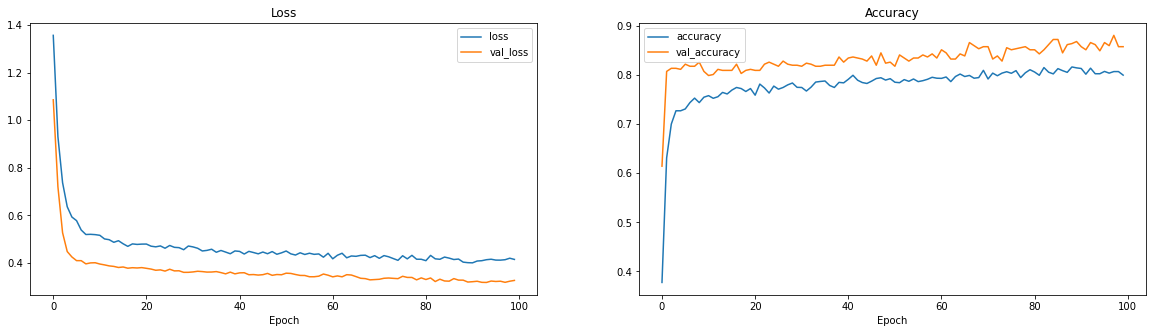

In [399]:
#Evaluation
hist_df = pd.DataFrame({k: history.history[k] for k in ["loss","accuracy","val_loss","val_accuracy"]})

#Graph
fig,ax = plt.subplots(1,2, figsize=(20,5))

hist_df[["loss", "val_loss"]].plot(ax=ax[0], title="Loss", xlabel="Epoch")
hist_df[["accuracy", "val_accuracy"]].plot(ax=ax[1], title="Accuracy", xlabel="Epoch")
plt.show()


In [400]:
model.evaluate(X_valid, y_valid)

15/15 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8574


[0.32692062854766846, 0.857442319393158]

## Model Evaluation

In [411]:
#make prediction against validation dataset
y = model.predict(X_valid)
y_predict = []

for x in y:
  label = np.argmax(x)
  y_predict.append(label)

y_predict = np.array(y_predict)

In [381]:
print(classification_report(y_valid,y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       130
         1.0       0.94      0.88      0.91       126
         2.0       0.75      0.84      0.80       109
         3.0       0.74      0.69      0.71       112

    accuracy                           0.86       477
   macro avg       0.85      0.85      0.85       477
weighted avg       0.86      0.86      0.86       477



## Model Inference

In [25]:
#load the best model
classifier = tf.keras.models.load_model("models/bestModel_v2")

In [35]:
y = classifier.predict(X_test)
y_result = []

for x in y:
  label = np.argmax(x)
  y_result.append(label)

y_ts = np.array(y_result)

In [36]:
print(classification_report(y_test, y_result))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        74
         1.0       0.96      0.93      0.95        84
         2.0       0.78      0.80      0.79        82
         3.0       0.73      0.73      0.73        79

    accuracy                           0.86       319
   macro avg       0.87      0.86      0.86       319
weighted avg       0.86      0.86      0.86       319

